In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from itertools import combinations

In [69]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
def import_data(file_name, col_list, seperator):
    df = pd.read_csv(file_name, sep=seperator, usecols=col_list )
    return df

In [63]:
def all_clusters(df, no_of_clusters):
    l = len(df.columns)
    for tuple_size in range(2, l+1):
        li = list(combinations(df.columns,tuple_size))
        cluster_pair_list(df, li, no_of_clusters)

In [64]:
def cluster_pair_list(df, pair_list, no_of_clusters):
    for pair in pair_list:
        df1 = df[list(pair)]
        kmeans = KMeans(n_clusters=no_of_clusters)
        distance = kmeans.fit_transform(df1)
        center = kmeans.cluster_centers_
        labels = kmeans.labels_
        
        local_closests_farthests(df1, distance, labels)
        outliers = global_outliers(df1, list(pair), center)
        
        plot_clusters(df1, outliers, pair, center, labels)

In [65]:
def plot_clusters(df, outliers, col_list, center, labels):
    if len(col_list)==2:
        ax = df.plot(kind='scatter',x=col_list[0],y=col_list[1],c=labels, edgecolors='b')
        ax.scatter(center[:,0],center[:,1], c='r', s=50)
        outliers.plot(kind='scatter',x=0,y=1, marker='+' ,c='k',s=50, ax=ax)
    elif len(col_list)==3:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(df[col_list[0]], df[col_list[1]], df[col_list[2]], c=labels)
        ax.scatter(center[:,0],center[:,1],center[:,2], c='r', s=50)
        ax.scatter(outliers[col_list[0]], outliers[col_list[1]], outliers[col_list[2]], c='k', s=80, marker='+')

In [72]:
def local_closests_farthests(df, distance, labels):
    distance = distance**2
    distance = distance.min(axis=1)
    df['Dist'] = distance
    df['labels'] = labels
    
    print("\n" + "\033[1m" + "The closest elements to each centroid" + "\033[0m" + "\n")
    for l in np.unique(labels):
        X_label = df[df['labels']==l]
        X_label.sort_values(['Dist'], inplace=True)
        print(X_label.head())
    print("\n" + "\033[1m" + "The farthest elements to each centroid" + "\033[0m" + "\n")
    for l in np.unique(labels):
        X_label = df[df['labels']==l]
        X_label.sort_values(['Dist'], inplace=True, ascending=[0])
        print(X_label.head())

In [ ]:
def global_outliers(df, pair, center):
    n = len(center)
    global_center = 0
    for i in range (n):
        global_center = global_center + center[i,:]
    global_center = global_center/n
    df['distance'] = np.linalg.norm(df[pair].sub(np.array(global_center)), axis=1)
    df = df.sort_values(['distance'], ascending=[0]).iloc[0:5, :]
    return df

In [67]:
df = import_data('BSE.csv', ['Open','High','Low','Close'], ',')


The closest elements to each centroid

         Open     Close         Dist  labels
789  27402.90  27306.83  1944.685418       0
979  27432.14  27346.82  3333.061182       0
828  27440.10  27366.07  4914.481231       0
790  27305.62  27364.92  5359.652774       0
788  27312.35  27287.66  6710.005542       0
         Open     Close          Dist  labels
176  34167.53  34192.65   6093.623367       1
205  34155.63  34184.04   8324.159940       1
214  34207.57  34297.47  10387.501149       1
216  34203.34  34300.47  11299.518922       1
240  34216.33  34352.79  23360.291986       1
          Open     Close          Dist  labels
1156  22783.65  22876.54   5531.856296       2
1157  22771.24  22758.37   8964.573691       2
1155  22892.50  22688.07  21907.526681       2
1163  22729.46  22715.33  23920.628371       2
1158  22644.75  22764.83  40994.322163       2

The farthest elements to each centroid

         Open     Close          Dist  labels
402  30616.53  30658.77  2.151851e+07       0

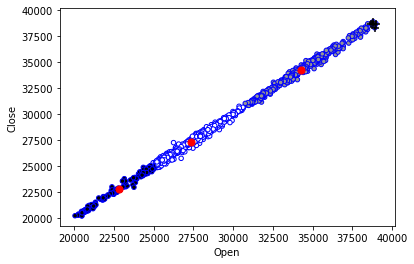

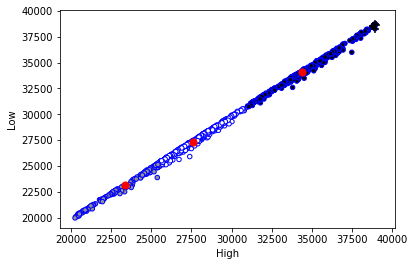

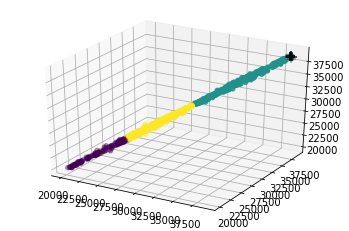

In [73]:
pair_list = [['Open','Close'], ['High','Low'], ['Open','High','Close']]
cluster_pair_list(df, pair_list, 3)


The closest elements to each centroid

         Open      High         Dist  labels
205  34155.63  34302.74   264.722743       0
176  34167.53  34313.14   270.917747       0
45   34203.70  34300.97  1093.916889       0
204  34141.22  34278.63  1216.894883       0
216  34203.34  34351.34  4005.338461       0
          Open      High         Dist  labels
511   26456.21  26540.83   726.213030       1
620   26410.66  26583.33  1616.335177       1
1045  26487.51  26570.38  1657.813914       1
517   26408.62  26587.07  1911.233336       1
1037  26434.16  26517.90  2494.262775       1

The farthest elements to each centroid

        Open      High          Dist  labels
81  38989.65  38989.65  4.524148e+07       0
78  38915.91  38934.35  4.402030e+07       0
82  38814.76  38938.91  4.311292e+07       0
80  38796.98  38819.06  4.184980e+07       0
79  38704.84  38838.45  4.118153e+07       0
          Open      High          Dist  labels
1208  20050.99  20255.52  8.073329e+07       1
1207  202

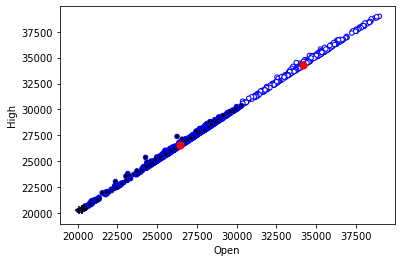

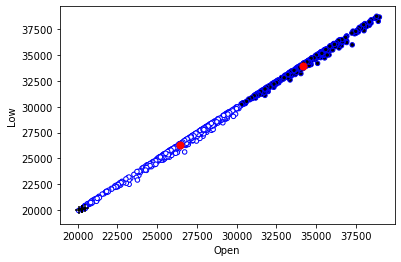

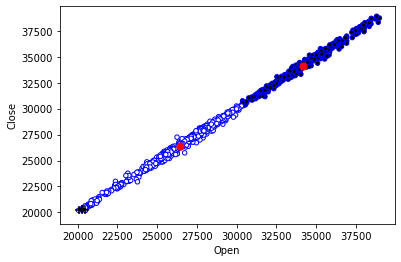

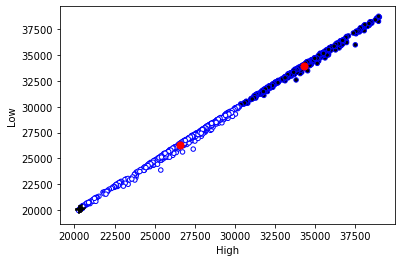

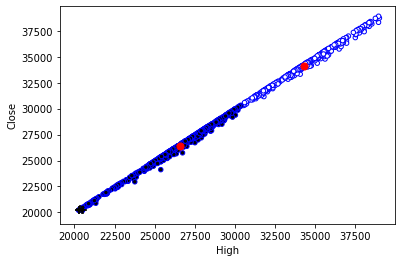

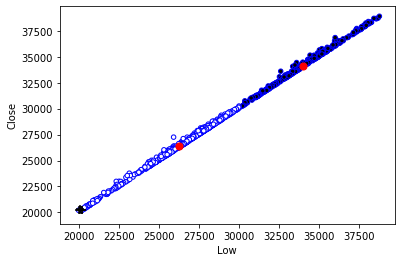

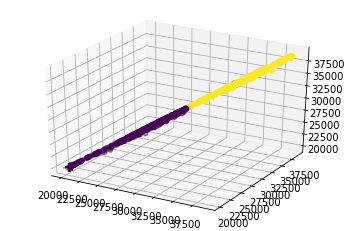

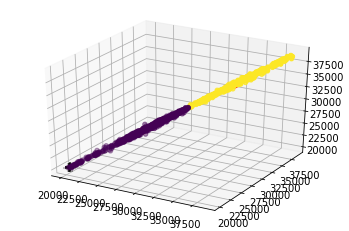

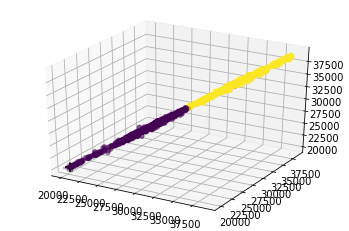

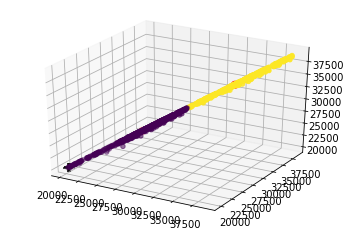

In [74]:
all_clusters(df, 2)